# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [133]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key as api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [134]:
# List for holding lat_lngs, cities, & country code
lat_lngs = []
cities = []
country_code = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city & country code for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, add city to the cities list & country to country code list
    if city not in cities:
        cities.append(city)
        country_code.append(country.upper())

# Print the city count to confirm sufficient count
len(cities)

609

### Create DataFrame Perform API Calls
* Create DataFrame with City & Country Code Data, create empty columns for API responses.
* Perform a weather check on each city using a series of successive API calls.
* Populate DataFrame with responses.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [135]:
#Create a dataframe to store the data
weather_df = pd.DataFrame({'City': cities, 'Country': country_code, 'Lat': "", 'Lng': "",
                             'Current Temp (\u00b0F)': "",'Min Temp (\u00b0F)': "",
                             'Max Temp (\u00b0F)': "",'Humidity (%)': "", 
                             'Cloudiness (%)': "", 'Wind Speed (mph)': "", 'Date (unix)': ""})

#Preview the dataframe
weather_df.head()


,City,Country,Lat,Lng,Current Temp (°F),Min Temp (°F),Max Temp (°F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date (unix)
0,longyearbyen,SJ,,,,,,,,,
1,sola,VU,,,,,,,,,
2,mataura,PF,,,,,,,,,
3,pochutla,MX,,,,,,,,,
4,hambantota,LK,,,,,,,,,


In [136]:
# set variables for response, create set to handle API limits
response_num = 1
response_set = 1

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#print statement to let user know the api call has been initiated.
print('''
-----------------------------
Starting Data Retrieval
-----------------------------''')
#itterate through DataFrame to make API calls 
for index, row in city_weather.iterrows(): 
    #Create API call
    response = requests.get(base_url + row['City'] + ',' + row['Country'] + '&APPID=' + api_key).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #print statement to let user know which record is being processed.
        print(f'Processing {response_num} of Set {response_set} | {response["name"]}')
        
        #Input data into the dataframe
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response['coord']['lon'] 
        weather_df.loc[index, 'Current Temp (\u00b0F)'] = response['main']['temp']
        weather_df.loc[index, 'Min Temp (\u00b0F)'] = response['main']['temp_min']
        weather_df.loc[index, 'Max Temp (\u00b0F)'] = response['main']['temp_max']
        weather_df.loc[index, 'Humidity (%)'] = response['main']['humidity']
        weather_df.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        weather_df.loc[index, 'Wind Speed (mph)'] = response['wind']['speed']
        weather_df.loc[index, 'Date (unix)'] = response['dt']
        
        #Increase the record count
        response_num += 1
        
    except (KeyError, IndexError):
        print("Skip, city not found")
    
    #API call limit control
    if response_num == 51:
        response_set += 1
        response_num = 1
        time.sleep(15)
#print statement to let user know query has ended        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''') 


-----------------------------
Starting Data Retrieval
-----------------------------
Processing 1 of Set 1 | Los Lunas
Processing 2 of Set 1 | Avarua
Processing 3 of Set 1 | Santa María del Oro
Processing 4 of Set 1 | Hermanus
Processing 5 of Set 1 | Ranong
Processing 6 of Set 1 | Saint-Philippe
Processing 7 of Set 1 | Hobart
Processing 8 of Set 1 | Broome
Processing 9 of Set 1 | Batemans Bay
Processing 10 of Set 1 | Geraldton
Processing 11 of Set 1 | Bengkulu
Processing 12 of Set 1 | Port Lincoln
Processing 13 of Set 1 | Souillac
Processing 14 of Set 1 | Busselton
Skip, city not found
Processing 15 of Set 1 | Rikitea
Processing 16 of Set 1 | Ushuaia
Processing 17 of Set 1 | Hilo
Processing 18 of Set 1 | Türkan
Processing 19 of Set 1 | Hithadhoo
Processing 20 of Set 1 | Quatis
Processing 21 of Set 1 | Meulaboh
Skip, city not found
Processing 22 of Set 1 | Lorengau
Processing 23 of Set 1 | Pechenga
Processing 24 of Set 1 | Yeppoon
Processing 25 of Set 1 | Sitka
Processing 26 of Set 1 | 

Processing 22 of Set 5 | Hasaki
Processing 23 of Set 5 | Cidreira
Processing 24 of Set 5 | Ryōtsu-minato
Processing 25 of Set 5 | Muzhi
Processing 26 of Set 5 | Puerto Escondido
Processing 27 of Set 5 | Rio Grande
Processing 28 of Set 5 | Hamilton
Processing 29 of Set 5 | Acajutla
Processing 30 of Set 5 | Gulbene
Processing 31 of Set 5 | Alghero
Processing 32 of Set 5 | Bonthe
Processing 33 of Set 5 | Port-Gentil
Processing 34 of Set 5 | Borgarnes
Processing 35 of Set 5 | Yerbogachën
Processing 36 of Set 5 | Ahtopol
Processing 37 of Set 5 | Kargat
Processing 38 of Set 5 | Pangkalanbuun
Processing 39 of Set 5 | Zhuhai
Processing 40 of Set 5 | Aykhal
Processing 41 of Set 5 | Fort Smith
Processing 42 of Set 5 | Ust-Tsilma
Processing 43 of Set 5 | Saint-Chamond
Processing 44 of Set 5 | Angoche
Processing 45 of Set 5 | Şebinkarahisar
Processing 46 of Set 5 | Dikson
Processing 47 of Set 5 | Fagernes
Processing 48 of Set 5 | Vila Velha
Processing 49 of Set 5 | Alta Floresta
Skip, city not fou

Processing 1 of Set 10 | Omboué
Processing 2 of Set 10 | Huicungo
Skip, city not found
Processing 3 of Set 10 | Kampot
Processing 4 of Set 10 | Tegul'det
Processing 5 of Set 10 | Pathein
Processing 6 of Set 10 | ‘Āhuimanu
Processing 7 of Set 10 | Konde
Processing 8 of Set 10 | Hirara
Processing 9 of Set 10 | Santa Rosa
Processing 10 of Set 10 | Keighley
Skip, city not found
Processing 11 of Set 10 | Bāndarban
Processing 12 of Set 10 | Portoferraio
Processing 13 of Set 10 | Manaus
Processing 14 of Set 10 | Natal
Processing 15 of Set 10 | Nortelândia
Processing 16 of Set 10 | Binga
Processing 17 of Set 10 | Egvekinot
Processing 18 of Set 10 | Huangmei
Processing 19 of Set 10 | Hay River
Processing 20 of Set 10 | Krasnosel'kup
Processing 21 of Set 10 | Kaffrine
Processing 22 of Set 10 | Kununurra
Processing 23 of Set 10 | San Francisco
Processing 24 of Set 10 | Leamington
Skip, city not found
Skip, city not found
Processing 25 of Set 10 | Maniitsoq
Processing 26 of Set 10 | Svarstad
Proce

### Clean & convert DataFrame to csv & display preview of DataFrame
* Clean DataFrame for cities that were not found.
* Export the DataFrame into a .csv.
* Display preview of  DataFrame

In [156]:
#Remove cities that were not found
weather_df['Lat'] = weather_df['Lat'].replace(' ', np.nan)
weather_df_clean = weather_df.dropna()

#Save dataframe
weather_df_clean.to_csv("../output_data/cities.csv", index=False, header=True)

#Preview the dataframe
weather_df_clean.head()

,City,Country,Lat,Lng,Current Temp (°F),Min Temp (°F),Max Temp (°F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date (unix)
0,longyearbyen,SJ,34.81,-106.73,83.59,82.4,84.2,11,1,8.05,1588029763
1,sola,VU,-21.21,-159.78,82.4,82.4,82.4,78,98,3.36,1588029764
2,mataura,PF,25.93,-105.37,87.73,87.73,87.73,9,40,12.84,1588029764
3,pochutla,MX,-34.42,19.23,60.04,60.04,60.04,77,42,17.58,1588029764
4,hambantota,LK,9.97,98.63,78.8,78.8,78.8,88,75,1.12,1588029764


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [143]:
#check to see if max value of Humidity (%) is above 100 to determine if furthur action is needed.
weather_df_clean['Humidity (%)'].max()

100

In [144]:
#  Get the indices of cities that have humidity over 100%.


In [145]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [146]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

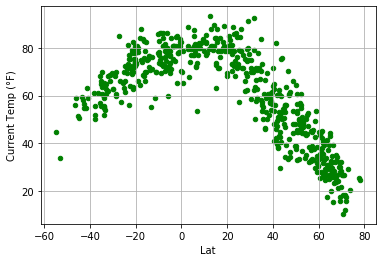

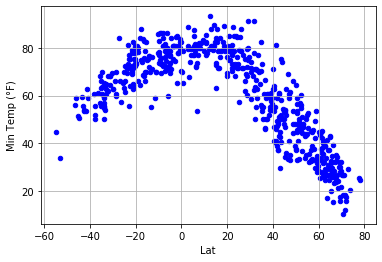

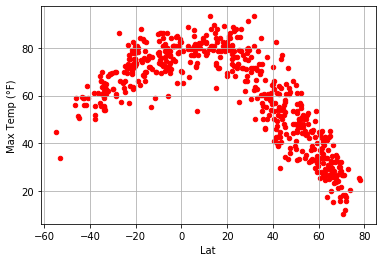

In [147]:
current_temp = weather_df_clean.plot(kind='scatter', x='Lat', y='Current Temp (°F)', color='g').grid()   
min_temp = weather_df_clean.plot(kind='scatter', x='Lat', y='Min Temp (°F)', color='b').grid() 
max_temp = weather_df_clean.plot(kind='scatter', x='Lat', y='Max Temp (°F)', color='r').grid()

## Latitude vs. Humidity Plot

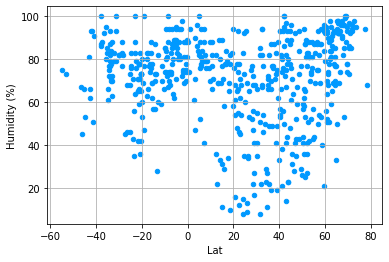

In [148]:
humidity = weather_df_clean.plot(kind='scatter', x='Lat', y='Humidity (%)', color='#0099ff').grid()

## Latitude vs. Cloudiness Plot

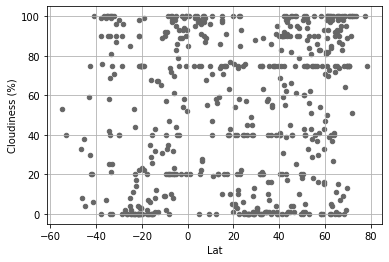

In [149]:
cloudiness = weather_df_clean.plot(kind='scatter', x='Lat', y='Cloudiness (%)', color='#666666').grid()

## Latitude vs. Wind Speed Plot

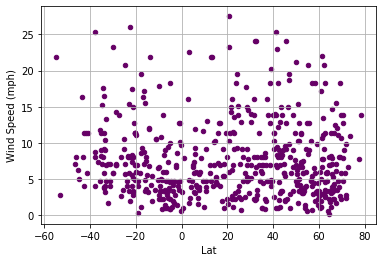

In [150]:
wind_speed = weather_df_clean.plot(kind='scatter', x='Lat', y='Wind Speed (mph)', color='#660066').grid()

## Linear Regression

In [151]:
# Create Northern and Southern Hemisphere DataFrames, reset index
nothern_hemisphere = weather_df_clean.loc[weather_df_clean['Lat'] >= 0.0]
nothern_hemisphere.reset_index()

southern_hemisphere = weather_df_clean.loc[weather_df_clean['Lat'] < 0.0]
southern_hemisphere.reset_index()


,index,City,Country,Lat,Lng,Current Temp (°F),Min Temp (°F),Max Temp (°F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date (unix)
0,1,sola,VU,-21.21,-159.78,82.4,82.4,82.4,78,98,3.36,1588029764
1,3,pochutla,MX,-34.42,19.23,60.04,60.04,60.04,77,42,17.58,1588029764
2,5,atuona,PF,-21.36,55.77,70,64.99,73.4,78,90,8.05,1588029764
3,6,hoa binh,VN,-42.88,147.33,57.97,55.4,59,66,75,8.05,1588029765
4,7,busselton,AU,-17.97,122.23,84.2,84.2,84.2,83,20,5.82,1588029765
...,...,...,...,...,...,...,...,...,...,...,...,...
181,588,dien bien,VN,-6.13,12.37,79.83,79.83,79.83,86,61,9.42,1588030056
182,601,ribeira brava,PT,-33.27,115.72,54,54,54,70,25,9.04,1588030075
183,605,carutapera,BR,-21.76,-52.12,70.48,70.48,70.48,65,0,7.87,1588029962
184,606,moron,MN,-20.73,139.5,78.8,78.8,78.8,36,0,12.75,1588030076


In [152]:
#function to calculate linear regression, plot, and save figure
def plotLinRegress(x_value, y_value, x_label, y_label, ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_values, "r-")
    plt.annotate(line_eq, lblpos=0, fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [153]:
x_value = nothern_hemisphere['Lat']
y_value = nothern_hemisphere['Max Temp (\u00b0F)'] 
x_label = 'Lat'
y_label = 'Max Temp (\u00b0F)'
plotLinRegress(x_value,y_value,x_label,y_label,5)

AttributeError: 'float' object has no attribute 'shape'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


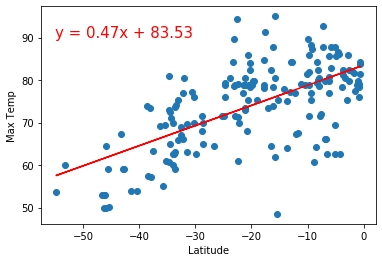

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


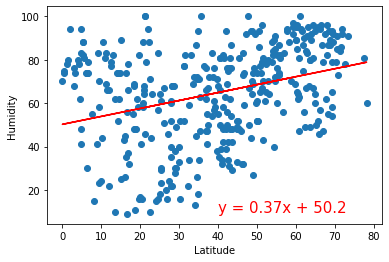

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


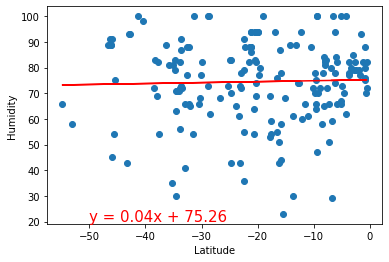

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


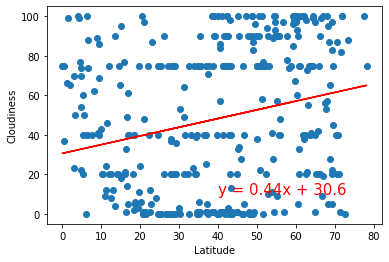

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


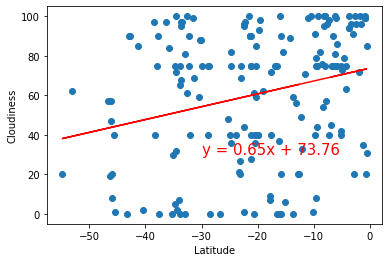

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


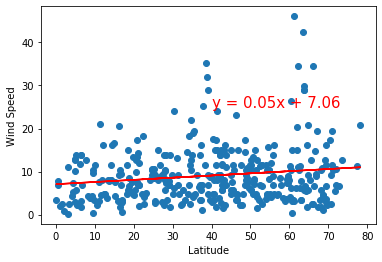

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


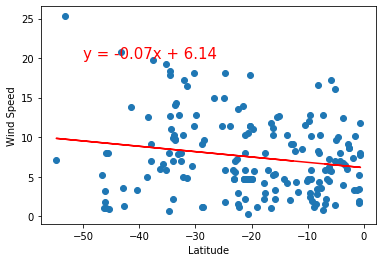